**Problem Statement Focus:** To check for NLP and Python capability to extract data elements from the financial statement documents.

**Data to be provided –** 
    • Training & Development Set - 500 Text files (OCR output of images)
	
Sample Data to be Extracted
Highlighted text on the image is required to be extracted


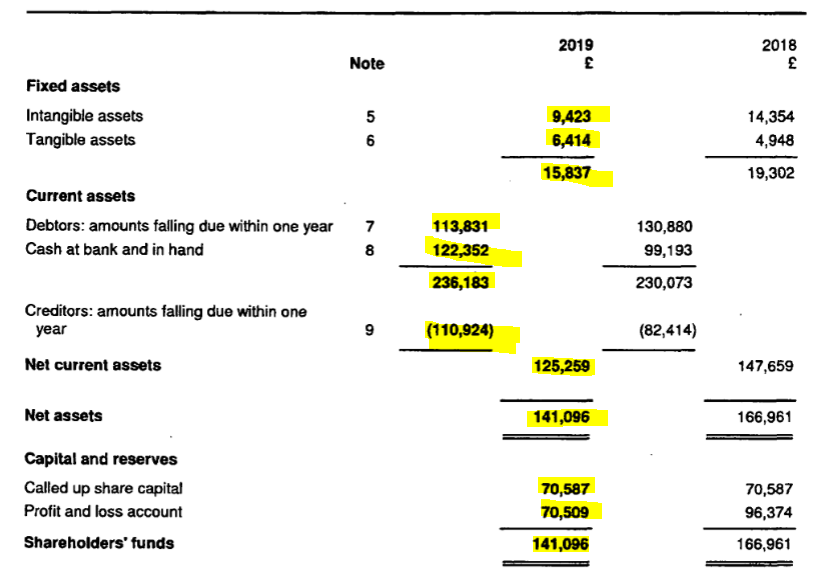



**Fields to be extracted are:**
   - Current Assets : 51,700
   - Creditors: amounts falling due within one year : 55,505
   - Net current liabilities : (3,805)
   - Total assets less current liabilities : (3,805)
   - Accruals and deferred income : (500)
   - Net liabilities : (4,305)
   - Capital and reserves : (4,305)


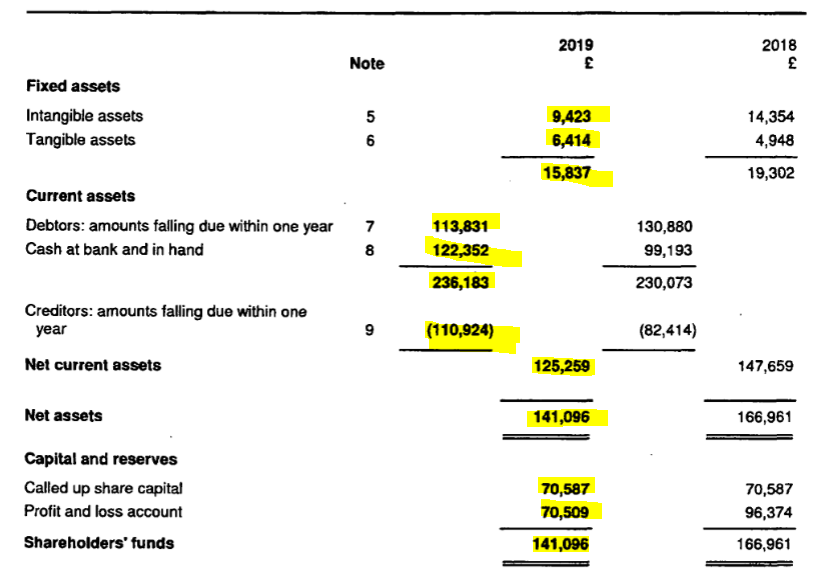


**Fields to be extracted are:** 
   - Fixed asset :  15837
   - Intangible assets : 9423
   - Tangible assets : 6414
   - Current Assets : 236,183
   - Debtors: amounts falling due within one year : 113,831
   - Cash at bank and in hand : 122,352
   - Creditors: amounts falling due within one year : (110,924)
   - Net current assets : 125,259 
   - Net assets : 141,096
   - Capital and reserves: -
   - Called up share capital : 70,587
   - Profit and loss accounts 70,509
   - Shareholders funds : 141,096


Please note, data only for year 2019 is to be extracted.


In [57]:
# Import important libary
import os
#from pathlib import Path
import json
import numpy as np 
import re
import pandas as pd 

In [58]:
fileContainingDir = './HCL ML Challenge Dataset/'
fileNames = os.listdir(fileContainingDir)
#print(fileNames)

In [59]:
 
# function to get unique values 
def unique(list1): 
    x = np.array(list1) 
    return np.unique(x) 
def extractEachLineInRequiredFormat(value):
    #value = re.sub(',', '', value)
    value = re.sub(r'(\d),(\d)', r'\1\2', value) # Remove, from number
    value = re.sub(r'\((\d*)\)', r'-\1', value) # Add -%d sign instead of (%d)
    value = re.sub('£', '&#163;', value) #Tanslate currency symbol to html code
    value = re.sub('  +', '  ', value) # Handle multiple spaces
    return value.strip()

In [53]:
#extractEachLineInRequiredFormat('                                 Net current assets (liabilities)                                                                     (54,659)        (56,001)                                                                    ')

In [20]:
fileNames = ['X8Y4VQ55.txt']

In [60]:
outputData = []
for fileName in fileNames: 
    # Using readlines() 
    firstFilePath = fileContainingDir + fileName
    file1 = open(firstFilePath, 'r') 
    Lines = file1.readlines()
    requiredLines = []
    flag = True
    resultDic = {}
    resultDicWithFileName = {}
    for line in Lines:
        if(flag):
            flag = False
            continue
        line = extractEachLineInRequiredFormat(line)
        lineLower = line.lower()
        if('notes to the accounts' in lineLower
           or 'for the year ending ' in lineLower
           or 'for the period ending ' in lineLower
           or 'the company is a private' in lineLower
           or 'the director is satisfied' in lineLower
           or 'the director arc satisfied' in lineLower
           or 'notes to the financial statements' in lineLower
           or 'principal activity' in lineLower
           or 'the director are satisfied' in lineLower
           or 'notes' == lineLower
           or 'statements' == lineLower
          or lineLower.startswith('number')):
            break
        else:
            if(line != ''):
                requiredLines.append(line)
    if(len(requiredLines)==0):
        resultDicWithFileName['Filename'] = fileName[0:-4]
        resultDicWithFileName['Extracted Values'] = resultDic
        outputData.append(resultDicWithFileName)
        continue
    if(requiredLines[0].lower().startswith('as at')
          or requiredLines[0].lower().startswith('31/03/2019')
          or requiredLines[0].lower().startswith('30 june 2019')):
        if(requiredLines[1].lower().startswith('registered number')):
            requiredLines = requiredLines[2:]
        else:
            requiredLines = requiredLines[1:]
    #print(requiredLines)
    if(requiredLines[0].lower().startswith('31 august 2019')
          or requiredLines[0].lower().startswith('31 may 2019')):
        requiredLines[0] = '2019'
    if(requiredLines[1].startswith('&#163;')
          or requiredLines[1].startswith('Notes')
          or requiredLines[1].startswith('€')):
        del requiredLines[1]
    years2019 = requiredLines[0].split('  ')
    del requiredLines[0]
    if(len(years2019)==1):
        if(years2019[0]=='2019' or '2019' in years2019[0]):
            for requiredLine in requiredLines:
                if re.search('[a-zA-Z]', requiredLine) is None:
                    requiredLine = 'nan' +'   '+requiredLine
                values = requiredLine.split('  ')
                if(len(values)==2):
                    resultDic[values[0]] =  values[1]
                else:
                    resultDic[values[0]] = 'nan'
        else:
            for requiredLine in requiredLines:
                values = requiredLine.split('  ')
                resultDic[values[0]] = 'nan'
    elif(len(years2019)==2):
        index = 0
        if(years2019[0] == '2019' or '2019' in years2019[0]):
            index = 1
        elif(years2019[1] == '2019' or '2019' in years2019[1]):
            index = 2
        else:
            index = 0
            
        if(index != 0):
            for requiredLine in requiredLines:
                if re.search('[a-zA-Z]', requiredLine) is None:
                    requiredLine = 'nan' +'   '+requiredLine
                values = requiredLine.split('  ')
                if(len(values)==3):
                    resultDic[values[0]] =  values[index]
                elif(len(values)==2):
                    resultDic[values[0]] =  values[1]
                else:
                    resultDic[values[0]] = 'nan'
        else:
            for requiredLine in requiredLines:
                values = requiredLine.split('  ')
                resultDic[values[0]] = 'nan'
    else:
        index = 0
        if(years2019[1] == '2019' or '2019' in years2019[1]):
            index = 1
        elif(years2019[2] == '2019' or '2019' in years2019[2]):
            index = 2
        else:
            index = 0
            
        if(index != 0):
            for requiredLine in requiredLines:
                if re.search('[a-zA-Z]', requiredLine) is None:
                    requiredLine = 'nan' +'   '+requiredLine
                values = requiredLine.split('  ')
                if(len(values)==4):
                    resultDic[values[0]] =  values[index+1]
                elif(len(values)==3):
                    resultDic[values[0]] =  values[index]  
                elif(len(values)==2):
                    resultDic[values[0]] =  values[1]
                else:
                    resultDic[values[0]] = 'nan'
        else:
            for requiredLine in requiredLines:
                values = requiredLine.split('  ')
                resultDic[values[0]] = 'nan'
    resultDicWithFileName['Filename'] = fileName[0:-4]
    resultDicWithFileName['Extracted Values'] = json.dumps(resultDic, ensure_ascii=False)
    print(fileName +"\n"+json.dumps(resultDic, ensure_ascii=False))
    outputData.append(resultDicWithFileName)
#print(outputData)

X8Y4W8G9.txt
{"Called up share capital not paid": "16", "Net assets": "16", "Tssued share capital": "nan", "16 Ordinary Shares of &#163; | each": "16", "Total Shareholder funds": "16"}
X8XZIIRN.txt
{"Called up share capital not paid": "1", "Net assets": "1", "Tssued share capital": "nan", "1 Ordinary Share 1 of &#163; each": "1", "Total Shareholder funds": "1"}
X8Y4U3IJ.txt
{"Called up share capital not paid": "-", "Fixed Assets": "-", "Current Assets": "1", "Prepayments and accrued income": "-", "Creditors: amounts falling due within one year": "0", "Net current assets (liabilities)": "1", "Total assets less current liabilities": "1", "Creditors: amounts falling due after more than one year": "0", "Provisions for liabilities": "0", "Accruals and deferred income": "0", "Total net assets (liabilities)": "1", "Capital and reserves": "1"}
X8Y28MDM.txt
{"Called up share capital not paid": "1", "Net assets": "1", "Tssued share capital": "nan", "1": "nan", "Total Shareholder funds": "1"}
X8Y

X8Y2F14H.txt
{"Current Assets": "10", "Net current assets (liabilities)": "10", "Total assets less current liabilities": "10", "Creditors: amounts falling due after more than one": "nan", "nan": "(5.786)", "year": "nan", "Total net assets (liabilities)": "-5776", "Capital and reserves": "-5776"}
X8Y4QNRD.txt
{"Current Assets": "nan", "Creditors: amounts falling due within one year": "nan", "Net current assets (liabilities)": "nan", "Total assets less current liabilities": "nan", "Total net assets (liabilities)": "nan", "Capital and reserves": "nan"}
X8Y4WHHN.txt
{"Current assets": "nan", "Cash at bank and in hand": "1", "Net assets": "1", "Issued share capital": "nan", "1 Ordinary Share 1 of &#163; each": "1", "Total Shareholder funds": "1 1"}
X8Y4S6AA.txt
{"Called up share capital not paid": "1", "Net assets": "1", "Tssued share capital": "nan", "1 Ordinary Share 1 of &#163; each": "1", "Total Shareholder funds": "1"}
X8Y4TOYI.txt
{"Fixed Assets": "53", "Current Assets": "3405", "Cred

X8Y4UEZT.txt
{"Current assets": "53257", "nan": " 53257", "Creditors: amounts falling due within": "nan", "one year": "-51443", "Net current assets": "1814", "Total assets less current liabilities": "1814", "Accruals and deferred income": "-700", "Net assets": "1114", "Capital and reserves": "1114"}
X8Y4QL1E.txt
{"Called up share capital not paid": "-", "Fixed Assets": "-", "Current Assets": "71 -", "Prepayments and accrued income": "-", "Creditors: amounts falling due within one year": "0", "Net current assets (liabilities)": "77 0", "Total assets less current liabilities": "77 0", "Creditors: amounts falling due after more than one year": "0", "Provisions for liabilities": "0", "Accruals and deferred income": "0", "Total net assets (liabilities)": "77 0", "Capital and reserves": "77 0"}
X8Y4UI1O.txt
{"Current assets": "nan", "Cash at bank and in hand": "2", "Net assets": "2", "Issued share capital": "nan", "2 Ordinary Shares 1 of &#163; each": "2", "Total Shareholder funds": "2"}
X8Y

X8Y28IWG.txt
{"Called up share capital not paid": "1", "Net assets": "1", "Tssued share capital": "nan", "11 Share 1 of &#163; each": "1", "Total Shareholder funds": "1"}
X8Y4RLJL.txt
{"Called up share capital not paid": "100", "Net assets": "100", "Tssued share capital": "nan", "100 Ordinary Shares of &#163; | each": "100", "Total Shareholder funds": "100"}
X8Y4VCSX.txt
{"Current assets": "nan", "Cash at bank and in hand": "1", "Net assets": "1", "Issued share capital": "nan", "1 Ordinary Share 1 of &#163; each": "1", "Total Shareholder funds": "1"}
X8XZI9MH.txt
{"Called up share capital not paid": "-", "Fixed Assets": "-", "Current Assets": "500000", "Prepayments and accrued income": "-", "Net current assets (liabilities)": "500000", "Total assets less current liabilities": "500000", "Total net assets (liabilities)": "500000", "Capital and reserves": "500000"}
X8Y28KZ5.txt
{"Called up share capital not paid": "10", "Fixed Assets": "-", "Current Assets": "-", "Prepayments and accrued 

In [61]:
df = pd.DataFrame(outputData) 
df.head(80)

,Extracted Values,Filename
0,"{""Called up share capital not paid"": ""16"", ""Ne...",X8Y4W8G9
1,"{""Called up share capital not paid"": ""1"", ""Net...",X8XZIIRN
2,"{""Called up share capital not paid"": ""-"", ""Fix...",X8Y4U3IJ
3,"{""Called up share capital not paid"": ""1"", ""Net...",X8Y28MDM
4,"{""Called up share capital not paid"": ""1"", ""Net...",X8Y4SWO1
5,"{""Current Assets"": ""1"", ""Net current assets (l...",X8Y4VOS8
6,"{""Called up share capital not paid"": ""0"", ""Cur...",X8Y4TVGA
7,"{""Called up share capital not paid"": ""100"", ""N...",X8Y2ER1U
8,"{""Fixed Assets"": ""1078"", ""Total assets less cu...",X8Y2F4YW
9,"{""Current assets"": ""nan"", ""Cash at bank and in...",X8Y4VBTE


In [62]:
df[['Filename','Extracted Values']].to_csv('submissions.csv', index=False)